# KNN Analysis of Spotify Music Features

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils

## Import Data for use in analysis

In [2]:
# Store filepath in a variable
SpotifyFeatures_file = "spotifyfixed.csv"
SpotifyFeatures_df = pd.read_csv(SpotifyFeatures_file, encoding="ISO-8859-1")
print(len(SpotifyFeatures_df))

176774


In [3]:
# Show just the header
SpotifyFeatures_df.head()

,Unnamed: 0,Unnamed: 0.1,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date
0,0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,...,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,2009-04-06
1,1,1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,...,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2015-10-27
2,2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,...,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2008-02-05
3,3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,...,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1998
4,4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,...,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,2017-01-06


In [4]:
#Added as Genre column was renaming to a weird name
#SpotifyFeatures_df.rename(columns={ SpotifyFeatures_df.columns[0]: "genre" }, inplace = True)
#SpotifyFeatures_df.head()
SpotifyFeatures_df = SpotifyFeatures_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
SpotifyFeatures_df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [6]:
# Replace Zeros 
zero_not_accepted = ['danceability','energy','key','mode','tempo']

for column in zero_not_accepted:
    SpotifyFeatures_df[column] = SpotifyFeatures_df[column].replace(0, np.NaN)

In [7]:
#Drop columns that are not needed in the data set
SpotifyFeatures_df = SpotifyFeatures_df.dropna(subset=zero_not_accepted)
SpotifyFeatures_df.head() 

,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,2009-04-06
1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2015-10-27
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2008-02-05
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1998
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,2017-01-06


In [8]:
print(len(SpotifyFeatures_df))

176774


## Need to enter selection criteria for Genre, Key, and mode

In [9]:
SpotifyFeatures_df_filtered = SpotifyFeatures_df.loc[(SpotifyFeatures_df['genre'] == 'Pop')]
                                                     # & (SpotifyFeatures_df['key'] == 'C#') 
                                                     # & (SpotifyFeatures_df['mode'] == 'Minor')]

In [10]:
print(len(SpotifyFeatures_df_filtered))
SpotifyFeatures_df_filtered.head()

2417


,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date
88842,Pop,Khalid,Talk,0rTV5WefWd1J3OwIheTzxM,94,0.0501,0.900,197487,0.400,0.000000,C,0.0876,-8.443,Major,0.1240,136.001,4/4,0.338,2018-09-07
88843,Pop,Sam Smith,Dancing With A Stranger (with Normani),6Qs4SXO9dwPj5GKvVOv8Ki,97,0.4500,0.741,171030,0.520,0.000002,G#,0.2220,-7.513,Major,0.0656,102.998,4/4,0.347,2006-01-31
88844,Pop,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,97,0.1910,0.687,214290,0.792,0.000000,F,0.1670,-2.749,Major,0.0452,100.015,4/4,0.671,2017-10-27
88845,Pop,Khalid,Better,6zeeWid2sgw4lap2jV61PZ,88,0.0765,0.596,229320,0.552,0.334000,C,0.1040,-10.278,Minor,0.0970,97.949,4/4,0.112,2016-10-28
88846,Pop,Dean Lewis,Be Alright,3EPXxR3ImUwfayaurPi3cm,92,0.6970,0.553,196373,0.586,0.000000,B,0.0813,-6.319,Major,0.0362,126.684,4/4,0.443,2016-03-11


# Use KNN to determine Popularity based off filtered data using
# Danceabiltiy, energy, tempo

In [11]:
#Drop columns that are not needed in the data set
# X = SpotifyFeatures_df_filtered.loc[:, ['popularity','danceability','energy','tempo','key','mode']]
X = SpotifyFeatures_df_filtered.loc[:, ['danceability','energy','tempo']]
y = SpotifyFeatures_df_filtered.loc[:, ['popularity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [12]:
# Create a StandardScater model and fit it to the training data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# Calculate the number of neighbors to test against, using the square root of the testing array rounded down to the nearest odd number
n_count = np.floor(math.sqrt(len(X_test)))

if (n_count % 2) == 0:
    n_count = n_count - 1
    
n_count = int(n_count)
n_count

21

k: 1, Train/Test Score: 0.998/0.045
k: 3, Train/Test Score: 0.382/0.029
k: 5, Train/Test Score: 0.291/0.035
k: 7, Train/Test Score: 0.249/0.037
k: 9, Train/Test Score: 0.229/0.043
k: 11, Train/Test Score: 0.210/0.052
k: 13, Train/Test Score: 0.191/0.045
k: 15, Train/Test Score: 0.176/0.052
k: 17, Train/Test Score: 0.177/0.054
k: 19, Train/Test Score: 0.170/0.050


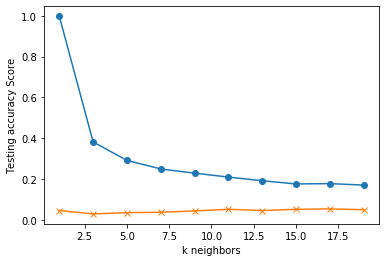

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, n_count, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, n_count, 2), train_scores, marker='o')
plt.plot(range(1, n_count, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=n_count, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())
print(f"k={n_count} Test Acc: %.3f" % knn.score(X_test, y_test))

k=21 Test Acc: 0.056


In [16]:
# Predict the test set Results
y_pred = knn.predict(X_test)
y_pred

array([64, 65, 65, 60, 65, 63, 69, 63, 58, 65, 63, 60, 64, 66, 64, 61, 60,
       61, 62, 68, 63, 73, 60, 64, 70, 64, 66, 71, 64, 63, 69, 60, 59, 69,
       59, 73, 63, 65, 63, 62, 75, 63, 61, 73, 63, 62, 70, 65, 64, 59, 70,
       62, 61, 63, 72, 63, 62, 62, 66, 66, 66, 60, 69, 60, 62, 61, 58, 66,
       64, 62, 64, 62, 73, 64, 66, 65, 61, 60, 61, 61, 59, 63, 67, 60, 64,
       64, 63, 64, 70, 61, 64, 60, 66, 66, 63, 58, 65, 69, 64, 65, 60, 66,
       66, 69, 68, 59, 58, 71, 63, 62, 62, 65, 58, 59, 63, 73, 60, 63, 69,
       61, 65, 63, 63, 70, 64, 69, 62, 57, 63, 64, 68, 56, 66, 55, 64, 70,
       69, 57, 60, 73, 60, 63, 65, 59, 60, 60, 66, 61, 70, 67, 66, 85, 61,
       57, 71, 63, 64, 68, 61, 62, 70, 63, 60, 63, 61, 69, 60, 65, 69, 60,
       73, 61, 59, 63, 66, 66, 69, 60, 65, 65, 60, 69, 66, 63, 65, 67, 66,
       64, 62, 63, 66, 59, 61, 63, 66, 60, 64, 56, 64, 64, 63, 64, 68, 65,
       63, 60, 62, 62, 73, 64, 62, 58, 64, 61, 64, 64, 66, 64, 66, 66, 63,
       61, 65, 62, 65, 60

In [17]:
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='micro')
Acc_Score = accuracy_score(y_test,y_pred)
print('Confusion Matrix')
print('------------------------------------')
print (cm)
print('------------------------------------')
print(f"f1 Score: {f1}")
print(f"Accuracy Score: {Acc_Score}")

Confusion Matrix
------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------
f1 Score: 0.05578512396694215
Accuracy Score: 0.05578512396694215


In [18]:
new_song_data = [[0.01, .01, 60]]
predicted_class = knn.predict(new_song_data)
print(f"Popularity of your song (0-100) is expected to be: {predicted_class}")

Popularity of your song (0-100) is expected to be: [64]


# Use KNN to determine Danceability based off filtered data using
# energy, tempo

In [19]:
#Drop columns that are not needed in the data set
# X = SpotifyFeatures_df_filtered.loc[:, ['popularity','danceability','energy','tempo','key','mode']]
X = SpotifyFeatures_df_filtered.loc[:, ['energy','tempo']]
y = SpotifyFeatures_df_filtered.loc[:, ['danceability']]


In [20]:
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y.danceability)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, test_size=0.2)

In [22]:
y_train

array([486, 206, 353, ..., 130, 349, 135], dtype=int64)

In [23]:
# Create a StandardScater model and fit it to the training data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
# Calculate the number of neighbors to test against, using the square root of the testing array rounded down to the nearest odd number
n_count = np.floor(math.sqrt(len(X_test)))

if (n_count % 2) == 0:
    n_count = n_count - 1
    
n_count = int(n_count)
n_count

21

k: 1, Train/Test Score: 1.000/0.006
k: 3, Train/Test Score: 0.341/0.004
k: 5, Train/Test Score: 0.202/0.006
k: 7, Train/Test Score: 0.159/0.004
k: 9, Train/Test Score: 0.132/0.004
k: 11, Train/Test Score: 0.109/0.006
k: 13, Train/Test Score: 0.099/0.006
k: 15, Train/Test Score: 0.093/0.006
k: 17, Train/Test Score: 0.083/0.006
k: 19, Train/Test Score: 0.078/0.006


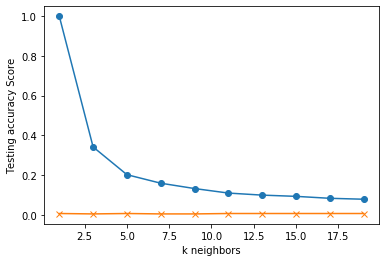

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, n_count, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, n_count, 2), train_scores, marker='o')
plt.plot(range(1, n_count, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=n_count, metric='euclidean')
knn.fit(X_train, y_train)
print(f"k={n_count} Test Acc: %.3f" % knn.score(X_test, y_test))

k=21 Test Acc: 0.004


In [27]:
# Predict the test set Results
y_pred = knn.predict(X_test)
y_pred

array([509, 329,  30, 407,  30, 354,  59, 102, 505, 516, 108, 176, 447,
       368,  23,  30,  83,  94, 399, 471, 220, 149, 281, 187,   8,  91,
       445,  42,  23, 487, 210, 211, 355, 314,  28, 447, 509, 447, 294,
       292, 234, 193, 373, 203, 173, 343, 267, 152, 210, 471, 135,  28,
       104, 176,  26, 467, 447,  95, 226,  15, 545,  85, 325, 355, 320,
       115,  12,   3,  98,  43, 110, 102, 211,  40, 348, 176,  95, 141,
       210,  15, 127, 185,  85, 176,   8,  23,  91, 198, 292,  15,  26,
       176,  69,  64,  12, 176, 148, 121, 296, 197, 330, 226, 447,  57,
       102, 152, 152, 136, 237,  66, 383, 155, 176,  45,   9, 115, 149,
       365, 383, 471, 320, 325, 267, 324, 143, 173, 399, 472, 229, 448,
        42, 419, 171, 127, 373, 187, 519,  69,   0,  12,  69, 267, 502,
       205,  33,  30, 136, 496,  69, 116, 445, 513, 110,  29, 194, 204,
        23, 364, 148, 136,  34, 373, 330, 316,  44, 354, 250, 368,  91,
       116,  15, 324, 409, 330, 229, 450,  32,  95,  11, 363, 23

In [28]:
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='micro')
Acc_Score = accuracy_score(y_test,y_pred)
print('Confusion Matrix')
print('------------------------------------')
print (cm)
print('------------------------------------')
print(f"f1 Score: {f1}")
print(f"Accuracy Score: {Acc_Score}")

Confusion Matrix
------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------
f1 Score: 0.004132231404958678
Accuracy Score: 0.004132231404958678


In [29]:
new_song_data = [[0.4, 136]]
predicted_class = knn.predict(new_song_data)
print(f"Danceability of your song (.001 - .999) is expected to be: {predicted_class}")

Danceability of your song (.001 - .999) is expected to be: [5]
